#### [ 미니 테스트  2024-03-14 ]<hr>

[1] 지도학습에 대한 설명과 종류에 대해서 간략하게 설명해 주세요.

알고리즘 모델에 정해진 데이터를 직접 학습시켜 원하는 기능을 갖게 하는 것으로
분류, 회귀 등이 존재한다. 

[2] 지도학습의 학습 프로세스를 간략하게 설명해 주세요.

모듈설정 -> 데이터셋 불러오기 -> 데이터 전처리 -> (만일 학습데이터와 검증데이터, 테스트 데이터가 따로 없다면)학습데이터 분리
-> 모델에 학습시키기 -> 검증 -> 과적합 확인 -> 충족되면 예측시킨다

[3] 선형회귀 대해 간략하게 설명해주세요.  
    - 개념  : 퍼져있는 데이터를 기준으로 거리가 전체적으로 가장 가까운 직선 
    - 조건  : 
    - 동작원리  
    - 선형식  : y = ax + b
    - 오차/잔차 계산 방법  

[4] 로지스틱회귀 대해 간략하게 설명해주세요.  
   - 개념  : 로지스틱 함수를 기준으로 0 과 1을 구분시켜 이진분류하는 모델
   - 조건  
   - 동작원리  
   - 선형식  
   - 오차/잔차 계산 방법  

[5] Fashion MNIST 데이터셋에서 10개 카테고리 중 하나를 선택해서 2진 분류로 구현해 주세요.  
- 데이터셋 : scikit-learn의 datasets 사용
    - from sklearn.datasets import fetch_openml 
    - db_name = 'Fashion-MNIST'
    - fashion_data = fetch_openml(name=db_name, parser='auto')

1) 모듈 로딩 및 데이터 준비<hr>

In [2]:
from sklearn.datasets import fetch_openml


In [3]:
import torch
import torch.nn as nn               # LinearRegression 기능의 클래스 Linear
import torch.nn.functional as F     # 손실함수
import torch.optim as optim         # 경사하강법 기반의 최적화 관련 모듈
import pandas as pd
import numpy as np

In [4]:
# 랜덤시드 설정
torch.manual_seed(1)

In [5]:
# ====> 데이터 준비
db_name = 'Fashion-MNIST'
fashion_data = fetch_openml(name=db_name, parser='auto')     # as_frame =False로 numpy로 받아온다
fashion_data

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       1       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0      33   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [6]:
fashion_data.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,31,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,27,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
fashion_data.target

0        9
1        0
2        0
3        3
4        0
        ..
69995    9
69996    1
69997    8
69998    1
69999    5
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [8]:
fashion_data.target == '5'

0        False
1        False
2        False
3        False
4        False
         ...  
69995    False
69996    False
69997    False
69998    False
69999     True
Name: class, Length: 70000, dtype: bool

In [9]:
### ====> 데이터 확인
feature = fashion_data.data
target = fashion_data.target

In [10]:
## 피쳐와 타겟 겟수 확인
print(f'Feature => {feature.shape}, {feature.ndim}D')
print(f'Target => {target.shape}, {target.ndim}D')

Feature => (70000, 784), 2D
Target => (70000,), 1D


In [11]:
### 분류 확인 ===>
print(f'Featrue name => {fashion_data.feature_names}')
print(f'Target name => {fashion_data.target_names}')
print(f'Categories => {fashion_data.categories}')
print(f'Categories => {target.unique}')

Featrue name => ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'p

2) 데이터 가공 및 전처리 <hr>
- 결측치/중복/이상치 => 없음
- 다중분류 ==> 2진분류 변환 : target 변환
- 표준화 ==> 이미지 동일 크기 및 색상채널 : 동일 크기(28*28)와 채널(흑백 1) 
- 정규화 ==> 피쳐 정규화 / 타겟 정규화

In [12]:
### ===> [2-1]  다중분류 ==> 2진분류 변환 : target 변환
target = target == '0'
target.unique()

array([False,  True])

In [13]:
### ===> [2-2] 정규화 ==> 피쳐 : 784개 색상값 즉, 0~255 범위 값
norm_feature = feature/255.          # 실수(255.)로 나누었기에 정수(255)가 아니라 실수 결과만 나온다
norm_feature.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.466667,0.447059,0.509804,0.298039,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.000000,0.000000,0.003922,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
### ===> [2-2] 정규화 ==> 타겟 : One-Hot 인코딩으로 변환
pd.get_dummies(target)        # 

,False,True
0,True,False
1,False,True
2,False,True
3,True,False
4,False,True
...,...,...
69995,True,False
69996,True,False
69997,True,False
69998,True,False


In [15]:
from sklearn.preprocessing import OneHotEncoder

targetDF = target.to_frame()            # DataFrame 화 시킨다
print(targetDF.shape)


(70000, 1)


In [16]:
# sparse_output = False : ndarray 타입으로 반환
ohencoder = OneHotEncoder(sparse_output=False)         # 압축된게 아니라 풀어서 받게 된다.
ohencoder.fit(targetDF)
ohencoder.categories_

[array([False,  True])]

In [17]:
ohencoder.transform(targetDF)

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [18]:
norm_target = ohencoder.transform(targetDF)
norm_target.shape, norm_target.ndim

((70000, 2), 2)

In [19]:
# target5DF = fashion_data.target == '5'      # 시리즈 타입
# target5DF

In [20]:
# fashion_data.data       # DataFrame 타입

In [21]:
# 훈련데이터
x_data = targetDF.values/255              # 스케일링으로 0~255 까지 범위를 0~1 범위로 스케일링
y_data = target
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [22]:
x_train

tensor([[0.0000],
        [0.0039],
        [0.0039],
        ...,
        [0.0000],
        [0.0000],
        [0.0000]])

In [23]:
y_train.shape

torch.Size([70000])

In [24]:
# y_train=torch.unsqueeze(y_train,dim=1)

In [25]:
print(x_train.shape)
print(y_train.shape)

torch.Size([70000, 1])
torch.Size([70000])


3) 학습 준비 <hr>
- 텐서화
- 데이터셋 준비 : 훈련용, 테스트용
- 학습 방법 : 지도학습 - 이진분류   => Linear 클래스 + sigmoid 함수
- 최적화 방법 : 경사하강법기반의 방법 => Adam, SDG
- 손실함수 : 이진분류 손실 계산 함수 => binary_cross_entropy

In [26]:
norm_target

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [43]:
target_false = norm_target.reshape(2,norm_target.shape[0])[0][0]
target_true = norm_target.reshape(2,norm_target.shape[0])[0][1]

In [42]:
norm_target

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [47]:
### ==> 데이터셋 준비 : 60000개 훈련, 10000개 테스트
limit = 60000

train = norm_feature.iloc[:limit]
test = norm_feature.iloc[limit:]

train_y = norm_target[:limit]
test_y = norm_target[limit:]

In [48]:
print(f'train {train.shape}, {train.ndim}D, {train_y.shape}, {train_y.ndim}D')
print(f'train {test.shape}, {test.ndim}D, {test_y.shape}, {test_y.ndim}D')


train (60000, 784), 2D, (60000, 2), 2D
train (10000, 784), 2D, (10000, 2), 2D


In [50]:
### ===> 텐서로 변환
X_train = torch.FloatTensor(train.values)
X_test = torch.FloatTensor(test.values)

y_train = torch.FloatTensor(train_y)
y_test = torch.FloatTensor(test_y)

In [51]:
y_train.shape

torch.Size([60000, 2])

In [52]:
print(f'X_train {X_train.shape}, {X_train.ndim}D, {y_train.shape}, {y_train.ndim}D')
print(f'X_test {X_test.shape}, {X_test.ndim}D, {y_test.shape}, {y_test.ndim}D')
# Linear 는 784 와 2

X_train torch.Size([60000, 784]), 2D, torch.Size([60000, 2]), 2D
X_test torch.Size([10000, 784]), 2D, torch.Size([10000, 2]), 2D


In [53]:
### 학습 인스턴스 생성
in_, out_ = X_train.shape[1], y_train.shape[1]
model = nn.Linear(in_, out_)
model

Linear(in_features=784, out_features=2, bias=True)

In [54]:
### 최적화 인스턴스 생성 ==> 모델에서 사용하는 w, b 변수들 전달
optimizer = optim.Adam(model.parameters())

In [55]:
### 학습횟수 => 샘플 처음부터 끝까지 읽는 것을 기준으로 횟수 지정
EPOCHS=150

4) 학습<hr>
- 반복횟수만큼 학습 진행

In [64]:
loss_accuracy =[[],[]]       # 로스율이 들어갈 리스트

for ep in range(EPOCHS):
    # 학습
    pre_y = model(X_train)
    # print(f'예측값 : {pre_y}')
    
    # 분류값 변환
    pre_y2=F.sigmoid(pre_y)
    # print(f'분류값 : {pre_y2}')
    
    # 오차 즉 손실 계산
    loss = F.binary_cross_entropy(pre_y2, y_train)
    loss_accuracy[0].append(loss.item())
    print(f'{ep} Loss => {loss}',end='\t')
    
    # w, b 업데이트
    optimizer.zero_grad()
    loss.backward()             # 손실함수 계산값으로 미분 진행하여 새로운 w,b 계산
    optimizer.step()            # 새로운 값으로 w, b 업데이트
    
    # 정확도() 계산 => 예측값을 0과 1로 변환 => 정답과 비교
    train_accuracy = (torch.argmax(pre_y2, dim=1)==torch.argmax(y_train, dim=1)).sum()/ y_train.shape[0]
    print(f'Train Accuracy => {train_accuracy}')
    loss_accuracy[1].append(train_accuracy.item())

0 Loss => 0.1106966882944107	Train Accuracy => 0.9575333595275879
1 Loss => 0.11068347841501236	Train Accuracy => 0.9575499892234802
2 Loss => 0.1106702983379364	Train Accuracy => 0.9575499892234802
3 Loss => 0.11065711826086044	Train Accuracy => 0.9575499892234802
4 Loss => 0.11064396053552628	Train Accuracy => 0.9575499892234802
5 Loss => 0.1106308177113533	Train Accuracy => 0.9575499892234802
6 Loss => 0.11061768978834152	Train Accuracy => 0.9575666785240173
7 Loss => 0.11060460656881332	Train Accuracy => 0.9575499892234802
8 Loss => 0.11059152334928513	Train Accuracy => 0.9575333595275879
9 Loss => 0.11057844758033752	Train Accuracy => 0.9575166702270508
10 Loss => 0.1105654165148735	Train Accuracy => 0.9575499892234802
11 Loss => 0.1105523630976677	Train Accuracy => 0.9575499892234802
12 Loss => 0.11053934693336487	Train Accuracy => 0.9575499892234802
13 Loss => 0.11052636802196503	Train Accuracy => 0.9575333595275879
14 Loss => 0.11051339656114578	Train Accuracy => 0.957533359527

In [36]:
(y_train == (pre_y>=0.5)).sum() / y_train.shape[0]

tensor(0.9466)

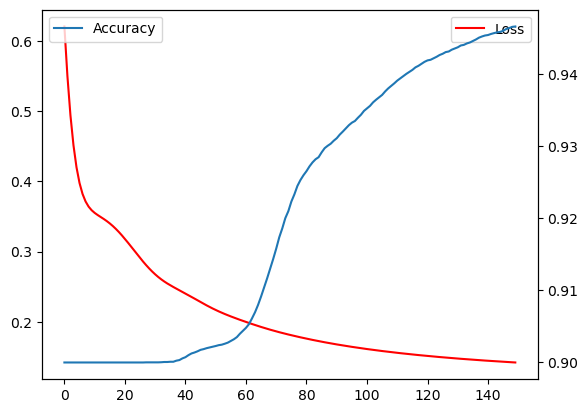

In [37]:
## 손실과 정확도 시각화
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

ax1.plot(loss_accuracy[0], label='Loss', color ='red')
ax1.legend()
ax2 = ax1.twinx()
ax2.plot(loss_accuracy[1], label='Accuracy')
plt.legend()
plt.show()

다중분류는 sigmoid 필요없이 softmax 도 상관없이 cross_entrophy가 포함하고있다

In [38]:
# # 모델 설계
# model = nn.Sequential(
#     nn.Linear(784,1),      # input: 2차원,  output : 1차원
#     nn.Sigmoid()        # 출력은 시그모이드 함수 거침
# )
# 
# # optimizer 설정
# optimizer = optim.SGD(model.parameters(), lr=0.9)


In [39]:
# # 학습 -----------------------------------------
#     
# def training():
#     nb_epochs = 1000
#     for epoch in range(nb_epochs + 1):
# 
#         # H(x) 계산
#         hypothesis = model(x_train)
# 
#         # cost 계산 => 이진 분류 손실함수  binary_cross_entropy()
#         cost = F.binary_cross_entropy(hypothesis, y_train)
# 
#         # cost로 W,b값 업데이트
#         optimizer.zero_grad()
#         cost.backward()
#         optimizer.step()
# 
#         # 20번마다 로그 출력
#         if epoch % 10 == 0:
#             prediction = hypothesis >= torch.FloatTensor([0.5])     # 예측값이 0.5를 넘으면 True로 간주
#             correct_prediction = prediction.float() == y_train      # 실제값과 일치하는 경우만 True로 간주
#             accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
#  
#             print(f'Epoch {epoch:4d}/{nb_epochs} Cost: {cost.item():.6f} Accuracy {accuracy * 100:2.2f}%')
#     

In [40]:
# training()